<a href="https://colab.research.google.com/github/sierrahotel777/220701251-CS19P18-DLC-Experiments/blob/main/DLC_1_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [ ]:
train_data = pd.read_csv('Train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (30975, 785)
Shape of X after separating features: (30975, 784)


In [ ]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (30975, 28, 28, 1)


In [ ]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (30975, 10)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (24780, 28, 28, 1)


In [ ]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8198 - loss: 0.6159 - val_accuracy: 0.9454 - val_loss: 0.1899
Epoch 2/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9494 - loss: 0.1639 - val_accuracy: 0.9533 - val_loss: 0.1576
Epoch 3/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9718 - loss: 0.0946 - val_accuracy: 0.9613 - val_loss: 0.1282
Epoch 4/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9772 - loss: 0.0730 - val_accuracy: 0.9629 - val_loss: 0.1262
Epoch 5/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9844 - loss: 0.0515 - val_accuracy: 0.9666 - val_loss: 0.1142
Epoch 6/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0350 - val_accuracy: 0.9655 - val_loss: 0.1273
Epoch 7/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9676 - val_loss: 0.1219
Epoch 8/10
775/775 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9940 - loss: 0.0204 - val_accuracy: 0.

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9713 - loss: 0.1216
Validation Accuracy: 96.82%


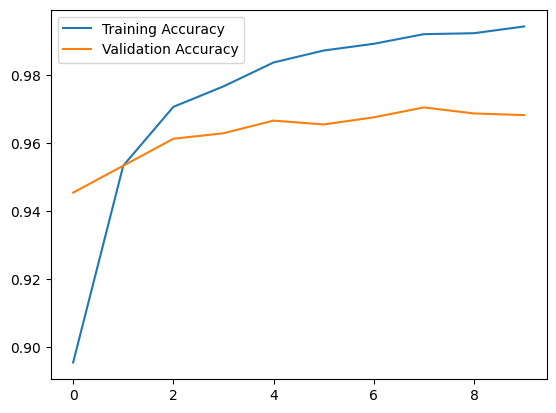

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


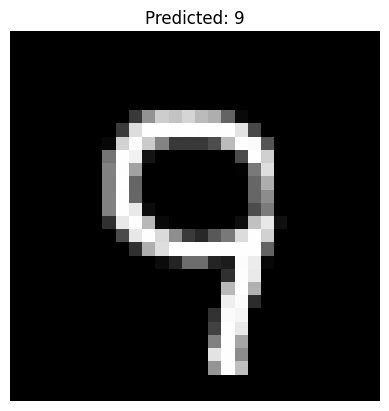

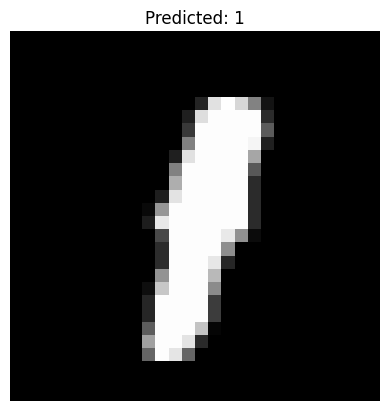

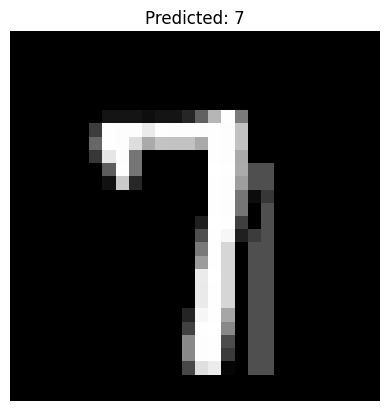

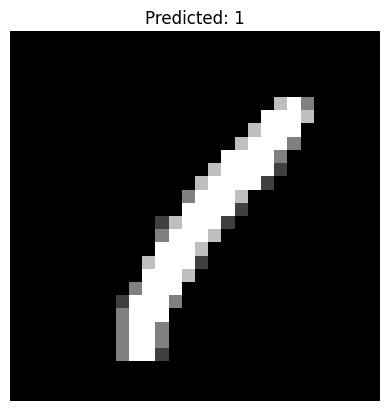

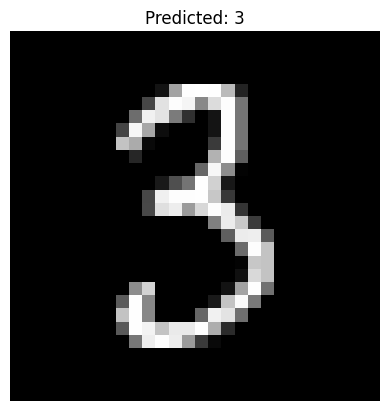

In [ ]:
test_data = pd.read_csv('test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()